# 04. Self Oil Staion Price Analysis

## 1. 셀레니움 설치
- 윈도우, mac(intel)
    - conda install selenium
- mac(m1)
    - pip install selenium

- 크롬 버전 106.0.5249.119

In [2]:
from selenium import webdriver

In [8]:
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get("https://www.naver.com")

In [9]:
driver.quit()   # driver.get()으로 연 뒤에 quit으로 닫아주어야 한다

### 2. 셀프 주요소가 정말 저렴하나요? - 데이터 확보하기 위한 작업
- https://www.opinet.co.kr/searRgSelect.do
- 사이트 구조 확인
- 목표 데이터
    - 브랜드
    - 가격
    - 셀프 주유 여부
    - 위치

## 3. 셀레니움으로 접근

In [5]:
from selenium import webdriver

In [9]:
# 페이지 접근
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(url)

In [38]:
driver.get(url)   # 재요청

- 문제
    - 1.해당 URL로 한 번에 접근이 안됩니다.
    - 2. 메인페이지로 접속이 되고, 팝업창이 하나 나옵니다.

In [17]:
# 팝업창 화면 전환 후 닫아주기
driver.switch_to_window(driver.window_handles[-1])

C:\Temp\ipykernel_7024\134562190.py:2: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])


In [5]:
#  접근 페이지 다시 요청

In [29]:
driver.close()

In [23]:
driver.switch_to_window(driver.window_handles[-1])

C:\Temp\ipykernel_7024\3023539272.py:1: DeprecationWarning: use driver.switch_to.window instead
  driver.switch_to_window(driver.window_handles[-1])


In [11]:
driver.get(url)

In [6]:
# 페이지 접근
import time

def main_get():
    url = "https://www.opinet.co.kr/searRgSelect.do"
    driver = webdriver.Chrome("../driver/chromedriver.exe")
    driver.get(url)
    time.sleep(3)    # ==> 셀레니움 작업속도가 느리므로 기다려줘야 한다  3초 멈춤

    # --------------현재 팝업창이 없으므로 지금은 사용하지 않는다----------------
    # 팝업창으로 전환
    # driver.switch_to_window(driver.window_handles[-1])
    # 팝업창 닫아주기
    # driver.close()
    # time.sleep(3)
    # 메인화면 창으로 전환
    # driver.switch_to_window(driver.window_handles[-1])

    # 접근 URL 다시 요청
    driver.get(url)

In [7]:
main_get()

In [16]:
# 지뎍: 시/도
sido_list_raw = driver.find_element_by_id("SIDO_NM0")
sido_list_raw.text

'            시/도\n            \n             \n             \n              서울\n             \n            \n             \n             \n              부산\n             \n            \n             \n             \n              대구\n             \n            \n             \n             \n              인천\n             \n            \n             \n             \n              광주\n             \n            \n             \n             \n              대전\n             \n            \n             \n             \n              울산\n             \n            \n             \n             \n              세종\n             \n            \n             \n             \n              경기\n             \n            \n             \n             \n              강원\n             \n            \n             \n             \n              충북\n             \n            \n             \n             \n              충남\n             \n            \n             \n             \n              

In [17]:
sido_list = sido_list_raw.find_elements_by_tag_name("option")
len(sido_list), sido_list[11].text

(18, '충북')

In [50]:
sido_list[1].get_attribute("value")   # <option value="서울특별시">tjdf</option>

'서울특별시'

In [51]:
# 1.
sido_names = []

for option in sido_list:
    sido_names.append(option.get_attribute("value"))
sido_names

['',
 '서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [18]:
# 2.
sido_names = [option.get_attribute("value") for option in sido_list]
sido_names[:5]

['', '서울특별시', '부산광역시', '대구광역시', '인천광역시']

In [19]:
# 0번째가 공백이므로 제거
sido_names = sido_names[1:]
sido_names[:5]

['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시']

In [20]:
sido_list_raw.send_keys(sido_names[0])   # [16]: 제주

In [21]:
# 구
gu_list_raw = driver.find_element_by_id("SIGUNGU_NM0")  # 부모태그
gu_list = gu_list_raw.find_elements_by_tag_name("option")  # 자식태그
gu_names = [option.get_attribute("value") for option in gu_list]
gu_names = gu_names[1:]
gu_names[:5], len(gu_names), gu_names[0]

(['강남구', '강동구', '강북구', '강서구', '관악구'], 25, '강남구')

In [22]:
gu_list_raw.send_keys(gu_names[0])

In [24]:
# 엑셀 저장  클릭
driver.find_element_by_css_selector("#glopopd_excel").click()

In [23]:
driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()

In [25]:
element_get_excel = driver.find_element_by_id("glopopd_excel")
element_get_excel.click()

In [32]:
import time
from tqdm import tqdm_notebook

for gu in tqdm_notebook(gu_names):
    element = driver.find_element_by_id("SIGUNGU_NM0")
    element.send_keys(gu)
    time.sleep(3)
    
    element_get_excel = driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()
    time.sleep(3)

C:\Temp\ipykernel_15956\1737903914.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for gu in tqdm_notebook(gu_names):


  0%|          | 0/25 [00:00<?, ?it/s]

In [33]:
driver.close()

## 4. 데이터 정리하기

In [102]:
import pandas as pd
from glob import glob

In [52]:
# 파일 목록 한 번에 가져오기
glob("../data/지역_*.xls")    # 순서정렬x

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls',
 '../data\\지역_위치별(주유소) (14).xls',
 '../data\\지역_위치별(주유소) (15).xls',
 '../data\\지역_위치별(주유소) (16).xls',
 '../data\\지역_위치별(주유소) (17).xls',
 '../data\\지역_위치별(주유소) (18).xls',
 '../data\\지역_위치별(주유소) (19).xls',
 '../data\\지역_위치별(주유소) (2).xls',
 '../data\\지역_위치별(주유소) (20).xls',
 '../data\\지역_위치별(주유소) (21).xls',
 '../data\\지역_위치별(주유소) (22).xls',
 '../data\\지역_위치별(주유소) (23).xls',
 '../data\\지역_위치별(주유소) (24).xls',
 '../data\\지역_위치별(주유소) (25).xls',
 '../data\\지역_위치별(주유소) (3).xls',
 '../data\\지역_위치별(주유소) (4).xls',
 '../data\\지역_위치별(주유소) (5).xls',
 '../data\\지역_위치별(주유소) (6).xls',
 '../data\\지역_위치별(주유소) (7).xls',
 '../data\\지역_위치별(주유소) (8).xls',
 '../data\\지역_위치별(주유소) (9).xls',
 '../data\\지역_위치별(주유소).xls']

In [53]:
# 파일명 저장
stations_files = glob("../data/지역_*.xls")
stations_files[:5]

['../data\\지역_위치별(주유소) (1).xls',
 '../data\\지역_위치별(주유소) (10).xls',
 '../data\\지역_위치별(주유소) (11).xls',
 '../data\\지역_위치별(주유소) (12).xls',
 '../data\\지역_위치별(주유소) (13).xls']

In [54]:
# 하나만 읽어보기
tmp = pd.read_excel(stations_files[0], header=2)    # 표 이상하면 header 하나씩 없애보기
tmp.tail(2)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
11,서울특별시,SK매일주유소,서울특별시 강북구 삼양로 217 (미아동),SK에너지,02-982-8855,Y,-,1568,1368,-
12,서울특별시,(주)에이앤이청담주유소,서울특별시 강북구 도봉로 155 (미아동),SK에너지,02-981-5131,Y,-,-,-,-


In [55]:
tmp_raw = []

for file_name in stations_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

- 형식이 동일하고 연달아 붙이기만 하면 될 때는 concat

In [59]:
stations_raw = pd.concat(tmp_raw)
stations_raw

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,수유동주유소,서울특별시 강북구 도봉로 395 (수유동),GS칼텍스,02-902-9470,Y,-,1507,1297,-
1,서울특별시,태창에너지 좋은기름주유소,서울특별시 강북구 덕릉로 158 (번동),S-OIL,02-989-9806,N,-,1519,1319,-
2,서울특별시,(주)에프알엔디 직영 송정주유소,서울특별시 강북구 인수봉로 185 (수유동),SK에너지,02-993-5189,N,-,1519,1309,-
3,서울특별시,지에스이앤알 직영 미아주유소,서울특별시 강북구 도봉로 122 (미아동),GS칼텍스,02-987-5152,Y,1890,1519,1309,-
4,서울특별시,세종에너지 직영 세종주유소,서울특별시 강북구 삼양로 410 (수유동),S-OIL,02-907-5182,Y,-,1519,1309,1000
...,...,...,...,...,...,...,...,...,...,...
14,서울특별시,명일주유소,서울 강동구 고덕로 168 (명일동),SK에너지,02-3428-1739,N,1859,1679,1489,-
15,서울특별시,(주)삼표에너지 고덕주유소,서울 강동구 고덕로 39 (암사동),GS칼텍스,02-441-3327,N,1889,1689,1489,1180
16,서울특별시,CJ대한통운(주)직영 천호점주유소,서울 강동구 천중로 67 (천호동),현대오일뱅크,02-473-5189,N,-,1697,1499,1100
17,서울특별시,강동주유소,서울 강동구 양재대로 1509 (길동),SK에너지,02-477-5101,N,2263,1988,1798,1288


In [61]:
stations_raw.info()   # 모두 null값이 없고 문자열 타입

<class 'pandas.core.frame.DataFrame'>
Int64Index: 543 entries, 0 to 18
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      543 non-null    object
 1   상호      543 non-null    object
 2   주소      543 non-null    object
 3   상표      543 non-null    object
 4   전화번호    543 non-null    object
 5   셀프여부    543 non-null    object
 6   고급휘발유   543 non-null    object
 7   휘발유     543 non-null    object
 8   경유      543 non-null    object
 9   실내등유    543 non-null    object
dtypes: object(10)
memory usage: 46.7+ KB


In [62]:
station_raw.columns

Index(['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '고급휘발유', '휘발유', '경유', '실내등유'], dtype='object')

In [63]:
stations = pd.DataFrame({
    "상호": station_raw["상호"],
    "주소": station_raw["주소"],
    "가격": station_raw["휘발유"],
    "셀프": station_raw["셀프여부"],
    "상표": station_raw["상표"]
})
stations.tail(2)

,상호,주소,가격,셀프,상표
32,갤러리아주유소,서울 강남구 압구정로 426,2362,N,SK에너지
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스


In [68]:
for eachAddr in stations["주소"]:
    print(eachAddr.split()[1])

강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
강동구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동대문구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
동작구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
마포구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서대문구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
서초구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성동구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
성북구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
송파구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
양천구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
영등포구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
강북구
용산구
용산구
용산구

In [69]:
stations["구"] = [eachAddr.split()[1] for eachAddr in stations["주소"]]
stations.head()

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1672,Y,현대오일뱅크,강동구
1,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1689,Y,현대오일뱅크,강동구
2,구천면주유소,서울 강동구 구천면로 357 (암사동),1694,N,현대오일뱅크,강동구
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1695,Y,SK에너지,강동구
4,(주)소모에너지 신월셀프주유소,서울 강동구 양재대로 1323 (성내동),1695,Y,GS칼텍스,강동구


In [71]:
stations["구"].unique(), len(stations["구"].unique())

(array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
        '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강서구',
        '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '강남구'], dtype=object),
 25)

In [ ]:
# stations[stations["구"]] == "서울특별시"
# stations.loc[stations["구"] == "서울특별시", "구"] = "성동구"
# stations[stations["구"]] == "특별시"
# stations.loc[stations["구"] == "서울특별시", "구"] = "도봉구"

In [72]:
# 가격 데이터형 변환 object => float
stations["가격"] = stations["가격"].astype("float")

ValueError: could not convert string to float: '-'

In [73]:
# 가격 정보 없는 주유소
stations[stations["가격"] == "-"]

,상호,주소,가격,셀프,상표,구
17,(주)자연에너지 국민주유소,서울 동대문구 답십리로 223 (답십리동),-,N,현대오일뱅크,동대문구
30,지에스칼텍스(주)내곡주유소,서울 서초구 헌릉로 210,-,N,GS칼텍스,서초구
23,평화주유소,서울 양천구 안양천로 657 (신정동),-,N,SK에너지,양천구
27,한일주유소,서울 영등포구 도림로 486 (문래동3가),-,N,SK에너지,영등포구
16,삼융주유소,서울 은평구 수색로 299 (수색동),-,N,SK에너지,은평구
8,현대오일뱅크㈜직영 재동주유소,서울 종로구 율곡로 58 (경운동),-,N,현대오일뱅크,종로구
10,지에스칼텍스(주)직영 역전점,서울 중구 퇴계로 15,-,N,GS칼텍스,중구
13,대성산업(주)구의주유소,서울 광진구 광나루로 570 (구의동),-,N,GS칼텍스,광진구
14,지에스칼텍스 (주)구의스타주유소,서울 광진구 자양로 103,-,N,GS칼텍스,광진구
15,현대오일뱅크㈜직영 장호셀프주유소,서울 광진구 자양로 37 (자양동),-,Y,현대오일뱅크,광진구


In [74]:
# 가격 정보가 있는 주유소만 사용
stations = stations[stations["가격"] != "-"]
stations.tail()

,상호,주소,가격,셀프,상표,구
29,대청주유소,서울 강남구 개포로 654 (일원동),2246,N,SK에너지,강남구
30,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,2248,N,현대오일뱅크,강남구
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2345,N,SK에너지,강남구
32,갤러리아주유소,서울 강남구 압구정로 426,2362,N,SK에너지,강남구
33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598,N,GS칼텍스,강남구


In [76]:
stations["가격"] = stations["가격"].astype("float")

C:\Temp\ipykernel_15956\693866580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations["가격"] = stations["가격"].astype("float")


In [77]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443 entries, 0 to 33
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상호      443 non-null    object 
 1   주소      443 non-null    object 
 2   가격      443 non-null    float64
 3   셀프      443 non-null    object 
 4   상표      443 non-null    object 
 5   구       443 non-null    object 
dtypes: float64(1), object(5)
memory usage: 24.2+ KB


In [78]:
stations

,상호,주소,가격,셀프,상표,구
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1672.0,Y,현대오일뱅크,강동구
1,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1689.0,Y,현대오일뱅크,강동구
2,구천면주유소,서울 강동구 구천면로 357 (암사동),1694.0,N,현대오일뱅크,강동구
3,방아다리주유소,서울 강동구 동남로 811 (명일동),1695.0,Y,SK에너지,강동구
4,(주)소모에너지 신월셀프주유소,서울 강동구 양재대로 1323 (성내동),1695.0,Y,GS칼텍스,강동구
...,...,...,...,...,...,...
29,대청주유소,서울 강남구 개포로 654 (일원동),2246.0,N,SK에너지,강남구
30,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,2248.0,N,현대오일뱅크,강남구
31,SK논현주유소,서울 강남구 논현로 747 (논현동),2345.0,N,SK에너지,강남구
32,갤러리아주유소,서울 강남구 압구정로 426,2362.0,N,SK에너지,강남구


In [79]:
# 인덱스 재정렬
stations.reset_index(inplace=True)
stations.tail()

,index,상호,주소,가격,셀프,상표,구
438,29,대청주유소,서울 강남구 개포로 654 (일원동),2246.0,N,SK에너지,강남구
439,30,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,2248.0,N,현대오일뱅크,강남구
440,31,SK논현주유소,서울 강남구 논현로 747 (논현동),2345.0,N,SK에너지,강남구
441,32,갤러리아주유소,서울 강남구 압구정로 426,2362.0,N,SK에너지,강남구
442,33,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구


In [80]:
del stations["index"]
stations.tail()

,상호,주소,가격,셀프,상표,구
438,대청주유소,서울 강남구 개포로 654 (일원동),2246.0,N,SK에너지,강남구
439,(주)새서울네트웍스 제이제이주유소,서울 강남구 언주로 716,2248.0,N,현대오일뱅크,강남구
440,SK논현주유소,서울 강남구 논현로 747 (논현동),2345.0,N,SK에너지,강남구
441,갤러리아주유소,서울 강남구 압구정로 426,2362.0,N,SK에너지,강남구
442,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구


## 주유 가격 정보 시각화

In [81]:
# matplotlib 한글 대응
import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "C:Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc("font", family=font_name)
else:
    print("Unkown system. sorry~~")

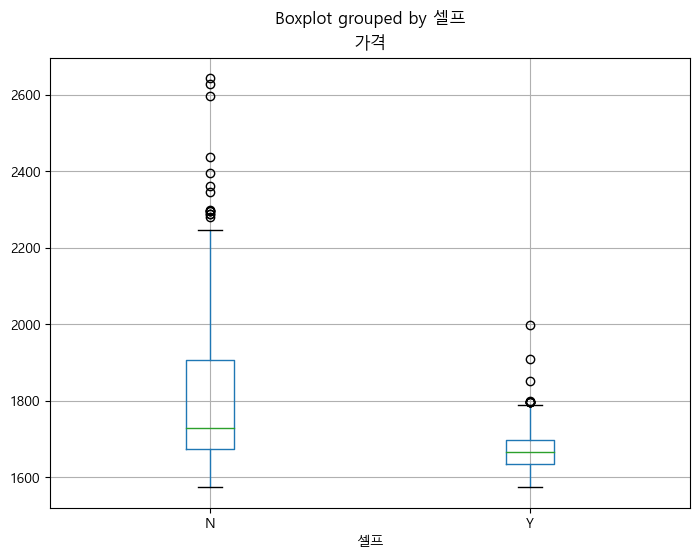

In [85]:
# boxplot(teat. pandas)
stations.boxplot(column="가격", by="셀프", figsize=(8,6));

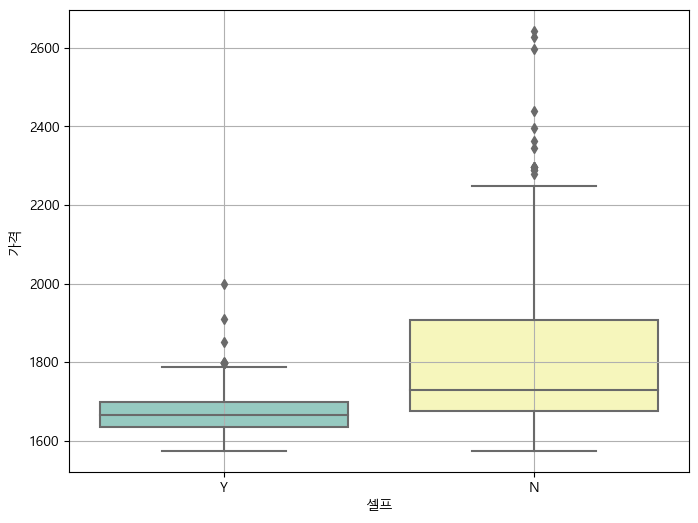

In [88]:
# boxplot(feat. seaborn)
plt.figure(figsize=(8,6))
sns.boxplot(x="셀프", y="가격", data=stations, palette="Set3")
plt.grid()
plt.show()

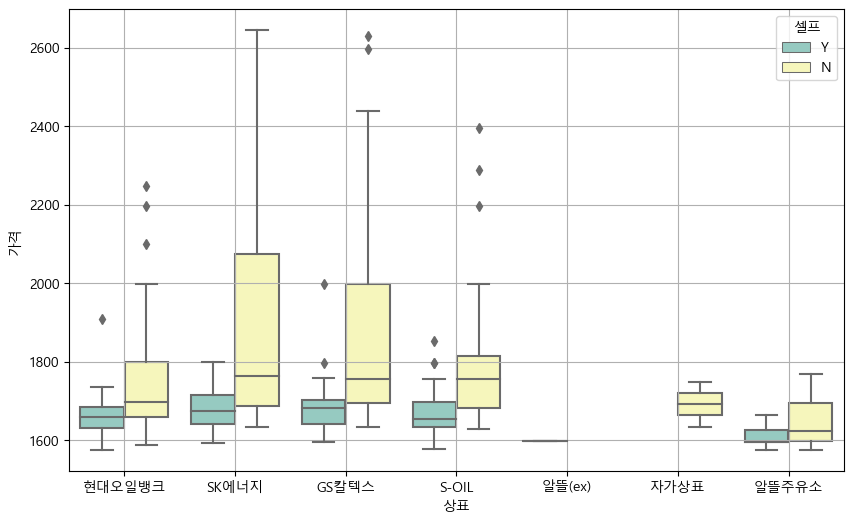

In [92]:
# boxplot(teat. seaborn)
plt.figure(figsize=(10,6))
sns.boxplot(x="상표", y="가격", data=stations, hue="셀프", palette="Set3")
plt.grid()
plt.show()

In [93]:
# 지도 시각화

In [94]:
import json
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)   # waring 무시

In [95]:
# 가장 비싼 주유소 10개
stations.sort_values(by="가격", ascending=False).head(10)

,상호,주소,가격,셀프,상표,구
273,서남주유소,서울 중구 통일로 30,2644.0,N,SK에너지,중구
239,서계주유소,서울 용산구 청파로 367 (청파동),2629.0,N,GS칼텍스,용산구
442,(주)만정에너지 삼보주유소,서울 강남구 봉은사로 433 (삼성동),2598.0,N,GS칼텍스,강남구
272,필동주유소,서울 중구 퇴계로 196 (필동2가),2439.0,N,GS칼텍스,중구
96,양재최고주유소,서울 서초구 매헌로 72 (양재동),2395.0,N,S-OIL,서초구
441,갤러리아주유소,서울 강남구 압구정로 426,2362.0,N,SK에너지,강남구
440,SK논현주유소,서울 강남구 논현로 747 (논현동),2345.0,N,SK에너지,강남구
366,구로주유소,서울 구로구 구로동로 137 (구로동),2298.0,N,GS칼텍스,구로구
238,에너비스,서울 용산구 한남대로 82 (한남동),2297.0,N,SK에너지,용산구
237,한남지점,서울 용산구 한남대로21길 4 (한남동),2297.0,N,SK에너지,용산구


In [100]:
# 가장 값싼 주유소 10개
stations.sort_values(by="가격", ascending=True).head(10)

,상호,주소,가격,셀프,상표,구
287,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),1574.0,N,알뜰주유소,강서구
288,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),1574.0,Y,현대오일뱅크,강서구
289,화곡역주유소,서울 강서구 강서로 154 (화곡동),1574.0,Y,알뜰주유소,강서구
166,현대주유소,서울 양천구 남부순환로 372 (신월동),1577.0,Y,S-OIL,양천구
167,형산석유(주)원주유소,서울 양천구 남부순환로 408,1589.0,N,현대오일뱅크,양천구
168,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1594.0,Y,SK에너지,양천구
290,목화주유소,서울 강서구 국회대로 251 (화곡동),1595.0,Y,알뜰주유소,강서구
194,영등포제일셀프주유소,서울 영등포구 가마산로 379,1595.0,Y,현대오일뱅크,영등포구
193,남서울고속주유소,서울 영등포구 가마산로 367 (대림동),1595.0,Y,SK에너지,영등포구
192,성락주유소,서울 영등포구 가마산로 414 (신길동),1595.0,Y,S-OIL,영등포구


In [104]:
import numpy as np
gu_data = pd.pivot_table(data=stations, index="구", values="가격", aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1916.794118
강동구,1759.142857
강북구,1641.916667
강서구,1682.757576
관악구,1711.714286


In [109]:
geo_path = "../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

my_map = folium.Map([37.5502, 126.982], zoom_start=10.5, tiles="Stamen Toner")
my_map.choropleth(
    geo_data=geo_str,
    data=gu_data,
    columns=[gu_data.index, "가격"],
    key_on="feature.id",
    fill_color="PuRd"
)
my_map